In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.5 MB/s eta 0:00:00


In [2]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# File to Load
dropout_data = "https://raw.githubusercontent.com/therahgithub/project-4/main/dropout.csv"

# Read School and Student Data File and store into Pandas DataFrames
dropout_data_df = pd.read_csv(dropout_data)

dropout_data_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
# Transform the target data to a single binary column indicating dropout (`1`) or no dropout (`0`)
dropout_df_dum = pd.get_dummies(dropout_data_df)

dropout_df = dropout_df_dum.drop(columns=['Target_Enrolled', 'Target_Graduate'])

dropout_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [4]:
# Seperate the features X from the target variable y
y = dropout_df['Target_Dropout']
X = dropout_df.drop(columns='Target_Dropout')

In [5]:
# Preview the features data
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [6]:
# Preview the first five entries for the target variable
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Target_Dropout, dtype: uint8

In [7]:
# Check the balance of our target values
y.value_counts()

0    3003
1    1421
Name: Target_Dropout, dtype: int64

In [8]:
# Scale the X data
X_scaled = StandardScaler().fit_transform(X)

In [9]:
# Perform a principal components analysis on the input data
components = None
pca = PCA(n_components = components)

# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [10]:
# Print the explained variances for each component
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[18.44131902 10.4212108   6.63605808  5.86210593  5.00564198  4.55939453
  4.20658451  3.95029298  3.58885757  3.20485749  2.99061786  2.91387846
  2.76083439  2.62974872  2.45270359  2.37641167  2.12732717  1.93749248
  1.81684736  1.66814094  1.59646531  1.46543466  1.43269511  1.16212589
  1.01483167  0.89715367  0.69257644  0.61842504  0.50286457  0.37319983
  0.2706432   0.25762592  0.1042672   0.06136597]



In [11]:
# Print the cumulative variances for each component
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 18.44131902  28.86252981  35.49858789  41.36069382  46.3663358
  50.92573033  55.13231483  59.08260781  62.67146538  65.87632287
  68.86694074  71.78081919  74.54165358  77.1714023   79.62410589
  82.00051757  84.12784474  86.06533722  87.88218458  89.55032552
  91.14679083  92.61222549  94.0449206   95.20704649  96.22187816
  97.11903184  97.81160827  98.43003331  98.93289788  99.3060977
  99.5767409   99.83436683  99.93863403 100.        ]



Text(0, 0.5, 'Explained variance (%)')

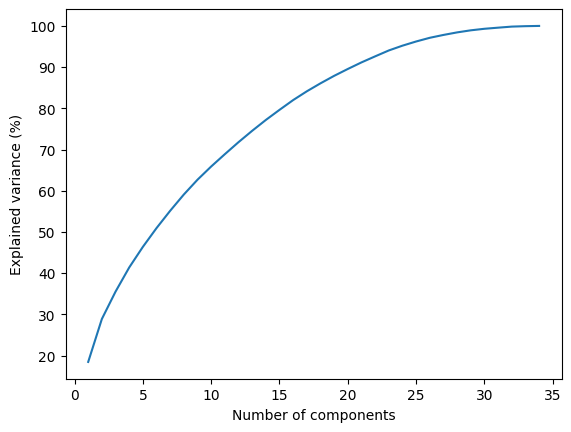

In [12]:
# Scree plot of all components.
components = len(pca.explained_variance_ratio_)
    
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[18.44131902 28.86252981 35.49858789 41.36069382 46.3663358  50.92573033
 55.13231483 59.08260781 62.67146538 65.87632287 68.86694074 71.78081919
 74.54165358 77.1714023  79.62410589 82.00051757 84.12784474 86.06533722]
Number of components: 18


Text(0, 0.5, 'Explained variance (%)')

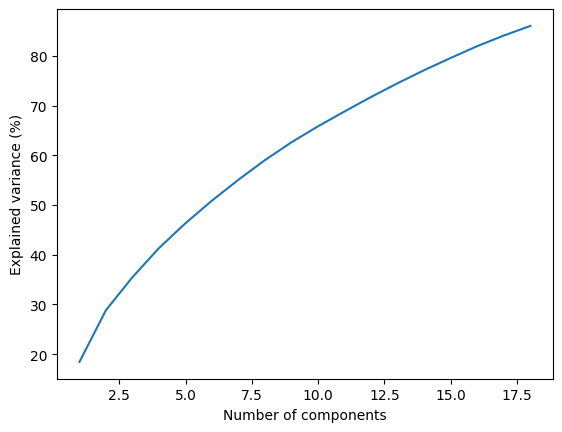

In [13]:
# Scree plot of the 18 principal components
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [14]:
# Display the importance of each feature that contributes to each of the components using the components_ attribute of the pca object
pca_components = abs(pca.components_)
print(pca_components)

[[0.01520284 0.0562429  0.01505966 0.03941047 0.01786234 0.03681246
  0.00492157 0.01696751 0.01840823 0.01273985 0.00825884 0.0168426
  0.01304328 0.02795759 0.07685348 0.06190963 0.02842838 0.03239518
  0.00187037 0.29645587 0.3604394  0.30014875 0.36141792 0.25274882
  0.04472303 0.29602658 0.34972901 0.29254042 0.33850193 0.25283117
  0.02122905 0.02270376 0.00113895 0.00636876]
 [0.24712922 0.33649332 0.23004184 0.10310452 0.24239649 0.22773136
  0.0037623  0.15117299 0.11103627 0.05965005 0.0202231  0.25992232
  0.02653866 0.14935411 0.20347389 0.15088341 0.17548397 0.39999227
  0.00249732 0.18798311 0.07555783 0.10344752 0.11660237 0.23058902
  0.10343762 0.1790464  0.02894783 0.03288117 0.16750888 0.2433119
  0.10581429 0.03303851 0.01898701 0.06111936]
 [0.17433188 0.00865987 0.02015122 0.15669042 0.17381379 0.03877734
  0.10897997 0.38775178 0.38500249 0.42772257 0.38634789 0.05574829
  0.00826873 0.03335169 0.09459846 0.14342396 0.18608799 0.13061462
  0.1110894  0.12324841 

In [15]:
# Print the top 4 features that contribute the most to each of the 18 components
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {dropout_df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Curricular units 1st sem (approved)', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)']
Component 1: ['Age at enrollment', 'Application mode', 'Displaced', 'Marital status']
Component 2: ["Mother's occupation", "Mother's qualification", "Father's occupation", "Father's qualification"]
Component 3: ['International', 'Nacionality', "Mother's occupation", "Father's occupation"]
Component 4: ['Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)', "Mother's occupation", "Father's occupation"]
Component 5: ['GDP', 'Curricular units 1st sem (without evaluations)', "Father's occupation", 'Curricular units 2nd sem (without evaluations)']
Component 6: ['Unemployment rate', 'Previous qualification', 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (credited)']
Component 7: ['Unemployment rate', 'GDP', 'Inflat

In [16]:
# Transform the 34 Columns to the 18 principal components
X_pca = pca.transform(X_scaled)

print(X_pca.shape)
print(X_pca)

(4424, 18)
[[-5.61626291 -0.1913814   0.85445831 ...  1.48289298 -0.87274967
  -0.17927673]
 [-0.29955147 -0.94669407  1.93841528 ...  0.38146712 -0.45298666
  -0.70327641]
 [-4.0188534   0.51081886 -0.11398122 ...  1.36560745 -0.28514744
  -1.01251319]
 ...
 [ 0.66951587 -1.01442843 -1.94961037 ... -0.06993205  0.67248633
   0.55507859]
 [-0.56397237 -1.70191511 -1.25774682 ... -0.23103115 -0.12119908
   0.12863992]
 [ 0.15215919 -0.96063744 -0.08175778 ... -0.49741788  0.01918377
  -0.99769038]]


In [17]:
# Split the dataset into training and testing subsets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1, stratify=y)

In [18]:
print(len(X_train[0]))

18


In [19]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=10), activation=activation, input_dim=18))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=10),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [20]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

In [21]:
# Run the kerastuner search for best hyperparameters
callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3,mode='auto')

tuner.search(X_train,y_train,epochs=200,validation_split=.15,callbacks=[callbacks])

Trial 508 Complete [00h 00m 16s]
val_accuracy: 0.8855421543121338

Best val_accuracy So Far: 0.8995984196662903
Total elapsed time: 00h 41m 41s


In [22]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 61,
 'num_layers': 6,
 'units_0': 81,
 'units_1': 71,
 'units_2': 11,
 'units_3': 21,
 'units_4': 21,
 'units_5': 91,
 'tuner/epochs': 23,
 'tuner/initial_epoch': 8,
 'tuner/bracket': 4,
 'tuner/round': 2,
 'tuner/trial_id': '0114'}

In [23]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

35/35 - 0s - loss: 0.3565 - accuracy: 0.8626 - 351ms/epoch - 10ms/step
Loss: 0.35648205876350403, Accuracy: 0.8625677824020386
